In [1]:
# import module
import pandas as pd
import numpy as np
import sqlite3 as sql
import time
import matplotlib.pyplot as plt


In [35]:
def cum_sum(lists):
    clist = []
    length = len(lists)
    clist = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return clist[1:]

In [27]:
# load result
result_RNN = pd.read_csv('result/out_sample_pred_RNN.csv')
result_RW = pd.read_csv('result/out_sample_pred_RW.csv',header = None)
#result_RNN.iloc[:,3:9]
y_true = result_RNN.iloc[:,2]
y_predict_RNN = result_RNN.iloc[:,1]
y_predict_RW = result_RW.iloc[:,0]

In [43]:
# compute Cumulative Squared Error between RNN-TVP and RW-TVP
CSE_RNN = np.array(cum_sum(np.square(y_true - y_predict_RNN)))
CSE_RW = np.array(cum_sum(np.square(y_true - y_predict_RW)))
CSE_diff = CSE_RNN - CSE_RW


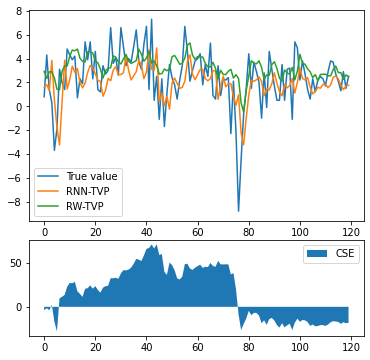

In [63]:
# Figure predicted value and cumulative Squared Error
x = range(120)

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(3, 2, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 0:])
mse_ax = fig.add_subplot(grid[-1,0:],sharex=main_ax)

# plot predicted value
main_ax.plot(x, y_true,label='True value')
main_ax.plot(x, y_predict_RNN,label='RNN-TVP')
main_ax.plot(x, y_predict_RW,label='RW-TVP')
main_ax.legend()

# plot CSE
mse_ax.fill_between(x, CSE_diff,label = 'CSE')
#mse_ax.plot(x, CSE_diff,label = 'CSE')
mse_ax.legend()
    
# Save the fig
plt.savefig('figure/econ_predict_evaluate')